## Context
* "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content
* Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

#### The data set includes information about:

* Dataset is taken from https://www.kaggle.com/blastchar/telco-customer-churn
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

## Inspiration
To explore this type of models and learn more about the subject.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.drop(['customerID'], axis = 1, inplace=True)

In [5]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


* No null entries

In [7]:
# unique entries in each column
for column in df:
    print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [8]:
# Replacing 'No phone service' to 'No' in 'MultipleLines'
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [9]:
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
cols_with_No_internet_service = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                 'StreamingTV', 'StreamingMovies']

for col in cols_with_No_internet_service:
    df[col] = df[col].replace('No internet service', 'No')

In [12]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [13]:
# hanging total charges type from string to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df['TotalCharges'].isnull().sum()

11

In [15]:
df[df['TotalCharges'].isnull()==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* After converting to numbers, we get 11 nan values in 'TotalCharges'. All of the instaces are for 'No' churn. As the number of nan values are lower, and 'No' churn category is much higher than 'yes' churn category, we will remove these instances

In [16]:
# import warnings
# warnings.simplefilter(action='ignore', category='FutureWarning')

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Churn', ylabel='count'>

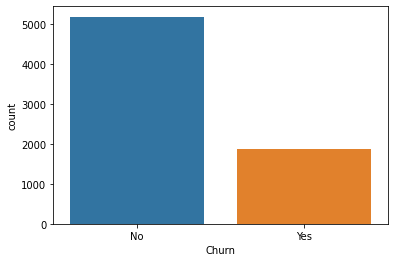

In [17]:
sns.countplot(df['Churn'])

In [18]:
df1 = df[~df['TotalCharges'].isnull()==True]

In [19]:
df1.shape

(7032, 20)

In [20]:
df_cat = df1.select_dtypes(include='object')
df_num = df1.select_dtypes(exclude='object')


In [21]:
df_cat_cols = df_cat.columns
df_cat.shape

(7032, 16)

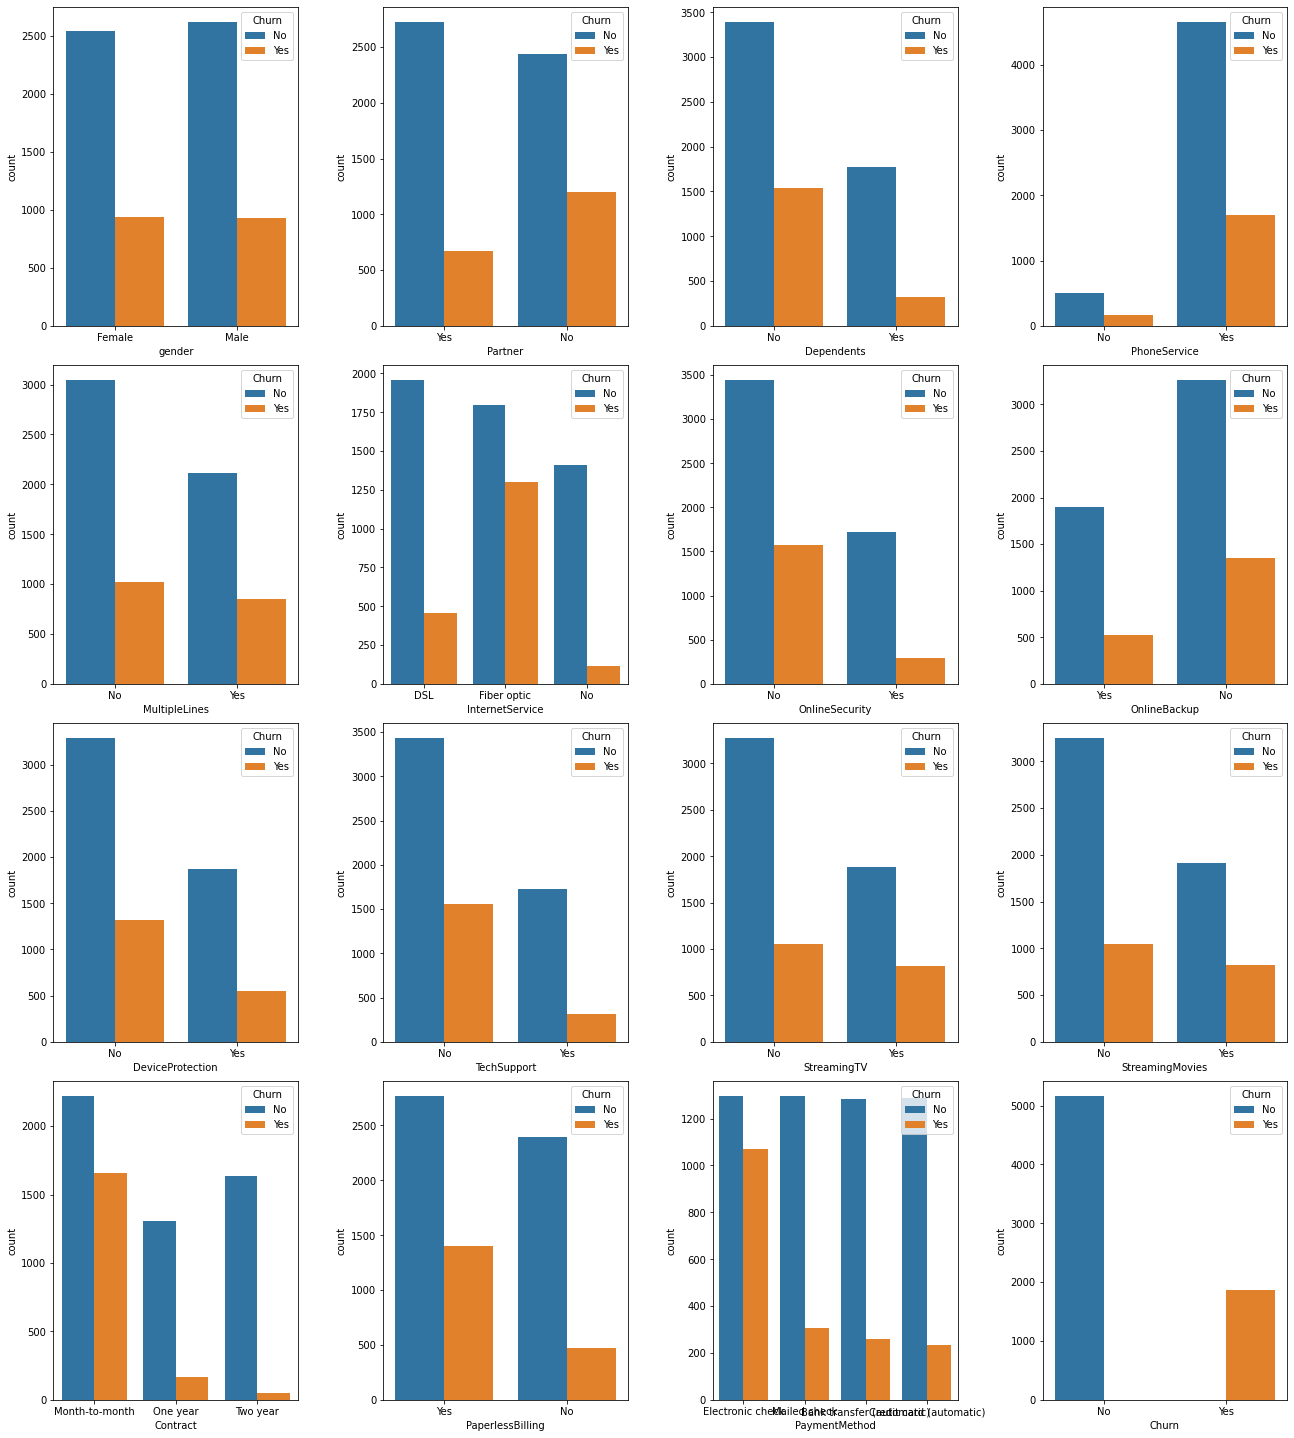

In [22]:
plt.figure(figsize=(18,20))
i = 1
for cols in df_cat:
    plt.subplot(4,4,i)
    sns.countplot(x=cols, hue='Churn', data=df1)
    i+=1
plt.tight_layout(pad=0.8)
plt.show()

In [23]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


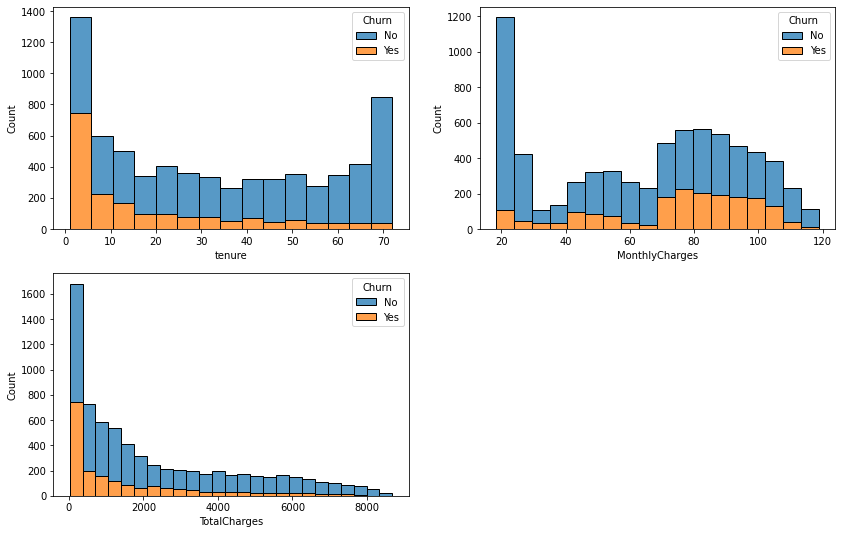

In [24]:
plt.figure(figsize=(14,9))
plt.subplot(2,2,1)
sns.histplot(data=df1, x='tenure', hue='Churn', multiple='stack')
plt.subplot(2,2,2)
sns.histplot(data=df1, x='MonthlyCharges', hue='Churn', multiple='stack')
plt.subplot(2,2,3)
sns.histplot(data=df1, x='TotalCharges', hue='Churn', multiple='stack')
plt.show()

* All of the numerical features may have effect in Churn prediction as the distributions are different churn and no charn instances.
* Customers with higher tenure tends to be in no churn category.
* Those who pays higher mothly charges tends to be in churn category.
* For total charges it is similar in both category.

In [25]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
for cols in df1:
    print(f'{cols}: {df1[cols].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [27]:
df1['gender']= df1['gender'].replace({'Female':0, 'Male':1})

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [30]:
for col in yes_no_cols:
    df1[col] = df1[col].replace({'Yes':0, 'No':1})

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
for cols in df1:
    print(f'{cols}: {df1[cols].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [0 1]
Dependents: [1 0]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [1 0]
MultipleLines: [1 0]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [1 0]
OnlineBackup: [0 1]
DeviceProtection: [1 0]
TechSupport: [1 0]
StreamingTV: [1 0]
StreamingMovies: [1 0]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [0 1]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [1 0]


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


* 3 object features have more than 2 categoris. We will use pandas get_dummies method for one hot encoding

In [33]:
df2 = pd.get_dummies(data= df1, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [34]:
df1.shape, df2.shape

((7032, 20), (7032, 27))

In [35]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,1,1,1,0,1,...,1,0,0,1,0,0,0,0,1,0
1,1,0,1,1,34,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,1,1,2,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,1,1,45,1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,1,1,2,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [36]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [37]:
cols_to_scale=['tenure', 'MonthlyCharges', 'TotalCharges']

In [38]:
df2[cols_to_scale].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [39]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [40]:
df2[cols_to_scale] = sc.fit_transform(df2[cols_to_scale])

In [41]:
for cols in df2:
    print(f'{cols}: {df2[cols].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [0 1]
Dependents: [1 0]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [1 0]
MultipleLines: [1 0]
OnlineSecurity: [1 0]
OnlineBackup: [0 1]
DeviceProtection: [1 0]
TechSupport: [

In [42]:
X = df2.drop(['Churn'], axis=1).values
y = df2['Churn'].values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

### Buliding ANN model

In [45]:
from tensorflow import keras

In [46]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 15)                405       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [48]:
hist = model.fit(X_train, y_train, epochs=2000)

Epoch 1/2000
176/176 [==============================] - 3s 4ms/step - loss: 0.4888 - accuracy: 0.7609
Epoch 2/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.4162 - accuracy: 0.8055
Epoch 3/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.4149 - accuracy: 0.8071
Epoch 4/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.4120 - accuracy: 0.8062
Epoch 5/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.4105 - accuracy: 0.8078
Epoch 6/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.4104 - accuracy: 0.8080
Epoch 7/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.4086 - accuracy: 0.8080
Epoch 8/2000
176/176 [==============================] - 1s 6ms/step - loss: 0.4069 - accuracy: 0.8100
Epoch 9/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.4065 - accuracy: 0.8092
Epoch 10/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.404

176/176 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.8309
Epoch 81/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.3518 - accuracy: 0.8336
Epoch 82/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.3513 - accuracy: 0.8338
Epoch 83/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.3520 - accuracy: 0.8315
Epoch 84/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.3510 - accuracy: 0.8308
Epoch 85/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.3509 - accuracy: 0.8329
Epoch 86/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.3496 - accuracy: 0.8340
Epoch 87/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.3485 - accuracy: 0.8334
Epoch 88/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.3490 - accuracy: 0.8329
Epoch 89/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.3497 - a

176/176 [==============================] - 1s 3ms/step - loss: 0.3266 - accuracy: 0.8460
Epoch 160/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.3242 - accuracy: 0.8475
Epoch 161/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8462
Epoch 162/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.3254 - accuracy: 0.8482
Epoch 163/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.3248 - accuracy: 0.8462
Epoch 164/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.8489
Epoch 165/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.3247 - accuracy: 0.8476
Epoch 166/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.3243 - accuracy: 0.8480
Epoch 167/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.3235 - accuracy: 0.8475
Epoch 168/2000
176/176 [==============================] - 1s 3ms/step - loss: 0

176/176 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8560
Epoch 238/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.3068 - accuracy: 0.8535
Epoch 239/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.3077 - accuracy: 0.8528
Epoch 240/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.3078 - accuracy: 0.8542
Epoch 241/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.3078 - accuracy: 0.8567
Epoch 242/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.3069 - accuracy: 0.8528
Epoch 243/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.3078 - accuracy: 0.8551
Epoch 244/2000
176/176 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8539
Epoch 245/2000
176/176 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8535
Epoch 246/2000
176/176 [==============================] - 0s 2ms/step - loss: 0

176/176 [==============================] - 1s 4ms/step - loss: 0.2944 - accuracy: 0.8612
Epoch 316/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2952 - accuracy: 0.8636
Epoch 317/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2970 - accuracy: 0.8597
Epoch 318/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2943 - accuracy: 0.8597
Epoch 319/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2945 - accuracy: 0.8588
Epoch 320/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2951 - accuracy: 0.8642
Epoch 321/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2928 - accuracy: 0.8617
Epoch 322/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2942 - accuracy: 0.8619
Epoch 323/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2948 - accuracy: 0.8606
Epoch 324/2000
176/176 [==============================] - 1s 3ms/step - loss: 0

176/176 [==============================] - 1s 5ms/step - loss: 0.2843 - accuracy: 0.8642
Epoch 394/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2841 - accuracy: 0.8697
Epoch 395/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2827 - accuracy: 0.8686
Epoch 396/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2816 - accuracy: 0.8672
Epoch 397/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2815 - accuracy: 0.8695
Epoch 398/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2813 - accuracy: 0.8679
Epoch 399/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2821 - accuracy: 0.8679
Epoch 400/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2819 - accuracy: 0.8699
Epoch 401/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2800 - accuracy: 0.8681
Epoch 402/2000
176/176 [==============================] - 1s 5ms/step - loss: 0

176/176 [==============================] - 1s 5ms/step - loss: 0.2742 - accuracy: 0.8700
Epoch 472/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2736 - accuracy: 0.8715
Epoch 473/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2726 - accuracy: 0.8722
Epoch 474/2000
176/176 [==============================] - 1s 6ms/step - loss: 0.2731 - accuracy: 0.8716
Epoch 475/2000
176/176 [==============================] - 1s 6ms/step - loss: 0.2729 - accuracy: 0.8734
Epoch 476/2000
176/176 [==============================] - 1s 6ms/step - loss: 0.2739 - accuracy: 0.8681
Epoch 477/2000
176/176 [==============================] - 1s 6ms/step - loss: 0.2715 - accuracy: 0.8715
Epoch 478/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2746 - accuracy: 0.8713
Epoch 479/2000
176/176 [==============================] - 1s 6ms/step - loss: 0.2738 - accuracy: 0.8690
Epoch 480/2000
176/176 [==============================] - 1s 5ms/step - loss: 0

176/176 [==============================] - 1s 4ms/step - loss: 0.2660 - accuracy: 0.8736
Epoch 550/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2681 - accuracy: 0.8731
Epoch 551/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2667 - accuracy: 0.8740
Epoch 552/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2688 - accuracy: 0.8732
Epoch 553/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2718 - accuracy: 0.8722
Epoch 554/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2672 - accuracy: 0.8745
Epoch 555/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2682 - accuracy: 0.8740
Epoch 556/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2682 - accuracy: 0.8740
Epoch 557/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2655 - accuracy: 0.8743
Epoch 558/2000
176/176 [==============================] - 1s 4ms/step - loss: 0

176/176 [==============================] - 1s 3ms/step - loss: 0.2616 - accuracy: 0.8805
Epoch 628/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2613 - accuracy: 0.8759
Epoch 629/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2609 - accuracy: 0.8784
Epoch 630/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2626 - accuracy: 0.8773
Epoch 631/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2614 - accuracy: 0.8789
Epoch 632/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2603 - accuracy: 0.8793
Epoch 633/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2612 - accuracy: 0.8756
Epoch 634/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2622 - accuracy: 0.8791
Epoch 635/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2630 - accuracy: 0.8772
Epoch 636/2000
176/176 [==============================] - 1s 3ms/step - loss: 0

176/176 [==============================] - 1s 5ms/step - loss: 0.2570 - accuracy: 0.8827
Epoch 706/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2581 - accuracy: 0.8811
Epoch 707/2000
176/176 [==============================] - 1s 6ms/step - loss: 0.2590 - accuracy: 0.8818
Epoch 708/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2569 - accuracy: 0.8825
Epoch 709/2000
176/176 [==============================] - 1s 6ms/step - loss: 0.2586 - accuracy: 0.8825
Epoch 710/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2596 - accuracy: 0.8763
Epoch 711/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2587 - accuracy: 0.8798
Epoch 712/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2600 - accuracy: 0.8827
Epoch 713/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2573 - accuracy: 0.8821
Epoch 714/2000
176/176 [==============================] - 1s 3ms/step - loss: 0

176/176 [==============================] - 1s 5ms/step - loss: 0.2556 - accuracy: 0.8811
Epoch 784/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2543 - accuracy: 0.8836
Epoch 785/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2538 - accuracy: 0.8816
Epoch 786/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2527 - accuracy: 0.8814
Epoch 787/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2562 - accuracy: 0.8804
Epoch 788/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2536 - accuracy: 0.8807
Epoch 789/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2530 - accuracy: 0.8836
Epoch 790/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2537 - accuracy: 0.8852
Epoch 791/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2547 - accuracy: 0.8798
Epoch 792/2000
176/176 [==============================] - 1s 5ms/step - loss: 0

176/176 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.8830
Epoch 862/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.2520 - accuracy: 0.8853
Epoch 863/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.2533 - accuracy: 0.8823
Epoch 864/2000
176/176 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.8828
Epoch 865/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.2529 - accuracy: 0.8814
Epoch 866/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.2514 - accuracy: 0.8834
Epoch 867/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2559 - accuracy: 0.8841
Epoch 868/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.8820
Epoch 869/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2525 - accuracy: 0.8834
Epoch 870/2000
176/176 [==============================] - 0s 3ms/step - loss: 0

176/176 [==============================] - 1s 3ms/step - loss: 0.2508 - accuracy: 0.8887
Epoch 940/2000
176/176 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.8848
Epoch 941/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.2463 - accuracy: 0.8885
Epoch 942/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.2454 - accuracy: 0.8889
Epoch 943/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2496 - accuracy: 0.8866
Epoch 944/2000
176/176 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8834
Epoch 945/2000
176/176 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.8846
Epoch 946/2000
176/176 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.8869
Epoch 947/2000
176/176 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.8857
Epoch 948/2000
176/176 [==============================] - 0s 2ms/step - loss: 0

176/176 [==============================] - 1s 4ms/step - loss: 0.2472 - accuracy: 0.8843
Epoch 1018/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.8860
Epoch 1019/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2452 - accuracy: 0.8864
Epoch 1020/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2451 - accuracy: 0.8873
Epoch 1021/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2472 - accuracy: 0.8848
Epoch 1022/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2463 - accuracy: 0.8868
Epoch 1023/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2454 - accuracy: 0.8869
Epoch 1024/2000
176/176 [==============================] - 0s 3ms/step - loss: 0.2469 - accuracy: 0.8876
Epoch 1025/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2495 - accuracy: 0.8843
Epoch 1026/2000
176/176 [==============================] - 1s 3ms/step 

176/176 [==============================] - 1s 4ms/step - loss: 0.2440 - accuracy: 0.8880
Epoch 1096/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2421 - accuracy: 0.8859
Epoch 1097/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2456 - accuracy: 0.8868
Epoch 1098/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2424 - accuracy: 0.8916
Epoch 1099/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2415 - accuracy: 0.8875
Epoch 1100/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2439 - accuracy: 0.8871
Epoch 1101/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2439 - accuracy: 0.8894
Epoch 1102/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2432 - accuracy: 0.8882
Epoch 1103/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2452 - accuracy: 0.8894
Epoch 1104/2000
176/176 [==============================] - 1s 4ms/step 

176/176 [==============================] - 1s 4ms/step - loss: 0.2465 - accuracy: 0.8857
Epoch 1174/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2408 - accuracy: 0.8884
Epoch 1175/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2407 - accuracy: 0.8873
Epoch 1176/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2429 - accuracy: 0.8869
Epoch 1177/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2415 - accuracy: 0.8848
Epoch 1178/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2404 - accuracy: 0.8868
Epoch 1179/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2408 - accuracy: 0.8905
Epoch 1180/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2438 - accuracy: 0.8860
Epoch 1181/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2415 - accuracy: 0.8882
Epoch 1182/2000
176/176 [==============================] - 1s 4ms/step 

176/176 [==============================] - 1s 3ms/step - loss: 0.2401 - accuracy: 0.8912
Epoch 1252/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2408 - accuracy: 0.8875
Epoch 1253/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2405 - accuracy: 0.8871
Epoch 1254/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2390 - accuracy: 0.8912
Epoch 1255/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2387 - accuracy: 0.8898
Epoch 1256/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2421 - accuracy: 0.8864
Epoch 1257/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2421 - accuracy: 0.8900
Epoch 1258/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2402 - accuracy: 0.8876
Epoch 1259/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2383 - accuracy: 0.8914
Epoch 1260/2000
176/176 [==============================] - 1s 4ms/step 

176/176 [==============================] - 1s 5ms/step - loss: 0.2371 - accuracy: 0.8908
Epoch 1330/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2389 - accuracy: 0.8891
Epoch 1331/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2415 - accuracy: 0.8860
Epoch 1332/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2378 - accuracy: 0.8921
Epoch 1333/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2382 - accuracy: 0.8907
Epoch 1334/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2387 - accuracy: 0.8880
Epoch 1335/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2389 - accuracy: 0.8912
Epoch 1336/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2368 - accuracy: 0.8887
Epoch 1337/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2395 - accuracy: 0.8892
Epoch 1338/2000
176/176 [==============================] - 1s 4ms/step 

176/176 [==============================] - 1s 4ms/step - loss: 0.2355 - accuracy: 0.8937
Epoch 1408/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2372 - accuracy: 0.8892
Epoch 1409/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2364 - accuracy: 0.8912
Epoch 1410/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2373 - accuracy: 0.8910
Epoch 1411/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2380 - accuracy: 0.8900
Epoch 1412/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2382 - accuracy: 0.8892
Epoch 1413/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2373 - accuracy: 0.8914
Epoch 1414/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2355 - accuracy: 0.8921
Epoch 1415/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2361 - accuracy: 0.8905
Epoch 1416/2000
176/176 [==============================] - 1s 4ms/step 

176/176 [==============================] - 1s 4ms/step - loss: 0.2370 - accuracy: 0.8898
Epoch 1486/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2380 - accuracy: 0.8891
Epoch 1487/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2378 - accuracy: 0.8907
Epoch 1488/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2344 - accuracy: 0.8917
Epoch 1489/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2387 - accuracy: 0.8889
Epoch 1490/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2410 - accuracy: 0.8876
Epoch 1491/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2397 - accuracy: 0.8884
Epoch 1492/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2342 - accuracy: 0.8914
Epoch 1493/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2364 - accuracy: 0.8916
Epoch 1494/2000
176/176 [==============================] - 1s 4ms/step 

176/176 [==============================] - 1s 4ms/step - loss: 0.2404 - accuracy: 0.8864
Epoch 1564/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2346 - accuracy: 0.8923
Epoch 1565/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2349 - accuracy: 0.8916
Epoch 1566/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2348 - accuracy: 0.8914
Epoch 1567/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2346 - accuracy: 0.8919
Epoch 1568/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2357 - accuracy: 0.8919
Epoch 1569/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2345 - accuracy: 0.8887
Epoch 1570/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2363 - accuracy: 0.8921
Epoch 1571/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2333 - accuracy: 0.8924
Epoch 1572/2000
176/176 [==============================] - 1s 4ms/step 

176/176 [==============================] - 1s 5ms/step - loss: 0.2342 - accuracy: 0.8919
Epoch 1642/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2383 - accuracy: 0.8882
Epoch 1643/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2335 - accuracy: 0.8907
Epoch 1644/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2305 - accuracy: 0.8942
Epoch 1645/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2304 - accuracy: 0.8928
Epoch 1646/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2353 - accuracy: 0.8891
Epoch 1647/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2338 - accuracy: 0.8891
Epoch 1648/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2324 - accuracy: 0.8908
Epoch 1649/2000
176/176 [==============================] - 1s 3ms/step - loss: 0.2317 - accuracy: 0.8930
Epoch 1650/2000
176/176 [==============================] - 1s 3ms/step 

176/176 [==============================] - 1s 4ms/step - loss: 0.2344 - accuracy: 0.8939
Epoch 1720/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2313 - accuracy: 0.8942
Epoch 1721/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2310 - accuracy: 0.8910
Epoch 1722/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2355 - accuracy: 0.8892
Epoch 1723/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2334 - accuracy: 0.8932
Epoch 1724/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2329 - accuracy: 0.8910
Epoch 1725/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2309 - accuracy: 0.8903
Epoch 1726/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2303 - accuracy: 0.8923
Epoch 1727/2000
176/176 [==============================] - 1s 6ms/step - loss: 0.2324 - accuracy: 0.8930
Epoch 1728/2000
176/176 [==============================] - 1s 5ms/step 

176/176 [==============================] - 1s 5ms/step - loss: 0.2324 - accuracy: 0.8933
Epoch 1798/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2348 - accuracy: 0.8926
Epoch 1799/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2314 - accuracy: 0.8896
Epoch 1800/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2296 - accuracy: 0.8935
Epoch 1801/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2317 - accuracy: 0.8956
Epoch 1802/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2335 - accuracy: 0.8940
Epoch 1803/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2342 - accuracy: 0.8910
Epoch 1804/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2318 - accuracy: 0.8933
Epoch 1805/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2340 - accuracy: 0.8903
Epoch 1806/2000
176/176 [==============================] - 1s 5ms/step 

176/176 [==============================] - 1s 5ms/step - loss: 0.2307 - accuracy: 0.8923
Epoch 1876/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2305 - accuracy: 0.8937
Epoch 1877/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2330 - accuracy: 0.8935
Epoch 1878/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2302 - accuracy: 0.8944
Epoch 1879/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2326 - accuracy: 0.8914
Epoch 1880/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2301 - accuracy: 0.8928
Epoch 1881/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2333 - accuracy: 0.8933
Epoch 1882/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2291 - accuracy: 0.8967
Epoch 1883/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2317 - accuracy: 0.8935
Epoch 1884/2000
176/176 [==============================] - 1s 5ms/step 

176/176 [==============================] - 1s 5ms/step - loss: 0.2335 - accuracy: 0.8924
Epoch 1954/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2325 - accuracy: 0.8928
Epoch 1955/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2286 - accuracy: 0.8946
Epoch 1956/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2310 - accuracy: 0.8921
Epoch 1957/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2303 - accuracy: 0.8953
Epoch 1958/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2311 - accuracy: 0.8921
Epoch 1959/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2319 - accuracy: 0.8892
Epoch 1960/2000
176/176 [==============================] - 1s 4ms/step - loss: 0.2312 - accuracy: 0.8939
Epoch 1961/2000
176/176 [==============================] - 1s 5ms/step - loss: 0.2325 - accuracy: 0.8910
Epoch 1962/2000
176/176 [==============================] - 1s 5ms/step 

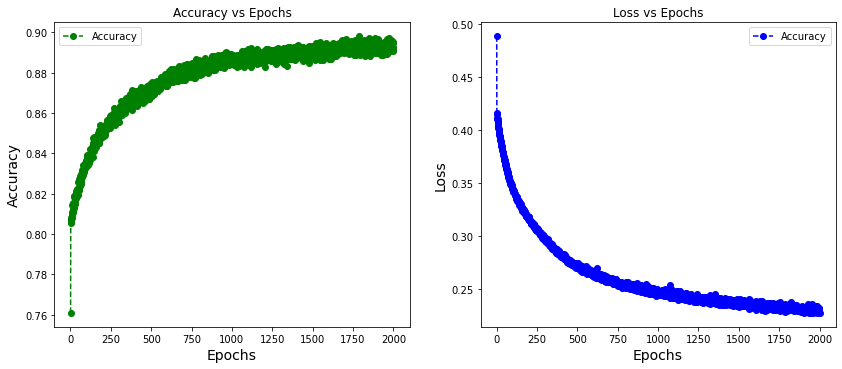

In [49]:
# Pltting Accuracy and loss
acc = hist.history['accuracy']
loss = hist.history['loss']
epochs = range(1, len(acc)+1)

fig, ax = plt.subplots(1,2, figsize=(14,5.6))

ax[0].plot(epochs, acc, 'go--', label='Accuracy')
ax[0].set_xlabel("Epochs", fontsize=14)
ax[0].set_ylabel("Accuracy", fontsize=14)
ax[0].set_title("Accuracy vs Epochs")
ax[0].legend()

ax[1].plot(epochs, loss, 'bo--', label='Accuracy')
ax[1].set_xlabel("Epochs", fontsize=14)
ax[1].set_ylabel("Loss", fontsize=14)
ax[1].set_title("Loss vs Epochs")
ax[1].legend()

plt.show()

In [50]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 3ms/step - loss: 1.4398 - accuracy: 0.7249


[1.4398113489151, 0.7249466776847839]

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_pred

array([[0.84511197],
       [0.0791409 ],
       [1.        ],
       ...,
       [0.2005479 ],
       [0.18170151],
       [0.67116946]], dtype=float32)

In [53]:
y_pred_binary = []
for element in y_pred:
    if element<0.5:
        y_pred_binary.append(0)
    else:
        y_pred_binary.append(1)

In [54]:
y_pred_binary

[1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,


In [55]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, classification_report

In [56]:
cm = confusion_matrix(y_test, y_pred_binary)
cm

array([[235, 173],
       [214, 785]])

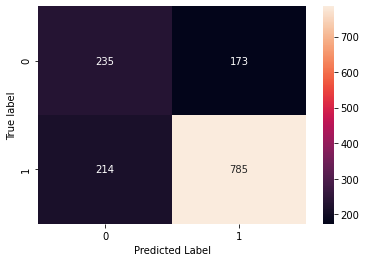

In [57]:
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel("True label")
plt.xlabel("Predicted Label")
plt.show()

In [58]:
f1_score(y_test, y_pred_binary)

0.8022483392948391

In [59]:
recall_score(y_test, y_pred_binary)

0.7857857857857858

In [60]:
precision_score(y_test, y_pred_binary)

0.8194154488517745

In [61]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.52      0.58      0.55       408
           1       0.82      0.79      0.80       999

    accuracy                           0.72      1407
   macro avg       0.67      0.68      0.68      1407
weighted avg       0.73      0.72      0.73      1407



### The recall and  the precession are poor for label 0 predictions. We need to rebalance the data to get good amount of prediction for both the label

In [64]:
df2.shape

(7032, 27)

In [69]:
df2['Churn'].value_counts()

1    5163
0    1869
Name: Churn, dtype: int64

In [66]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [67]:
X = df2.drop(['Churn'], axis=1)
y = df2['Churn']

In [68]:
xs, ys = smote.fit_resample(X, y)

In [70]:
ys.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2, random_state=5, stratify=ys)

In [73]:
model_sm = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_sm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 26)                702       
                                                                 
 dense_4 (Dense)             (None, 15)                405       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_sm.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [75]:
hist_sm = model_sm.fit(X_train, y_train, epochs=2000)

Epoch 1/2000
259/259 [==============================] - 2s 3ms/step - loss: 0.5374 - accuracy: 0.7328
Epoch 2/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.4770 - accuracy: 0.7707
Epoch 3/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.4700 - accuracy: 0.7736
Epoch 4/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.4645 - accuracy: 0.7766
Epoch 5/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.4607 - accuracy: 0.7791
Epoch 6/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.4554 - accuracy: 0.7791
Epoch 7/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.4515 - accuracy: 0.7805
Epoch 8/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.4488 - accuracy: 0.7845
Epoch 9/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.4462 - accuracy: 0.7843
Epoch 10/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.443

259/259 [==============================] - 1s 2ms/step - loss: 0.3649 - accuracy: 0.8380
Epoch 81/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3632 - accuracy: 0.8383
Epoch 82/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3632 - accuracy: 0.8372
Epoch 83/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3670 - accuracy: 0.8361
Epoch 84/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3635 - accuracy: 0.8385
Epoch 85/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3625 - accuracy: 0.8375
Epoch 86/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3628 - accuracy: 0.8379
Epoch 87/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3610 - accuracy: 0.8402
Epoch 88/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3589 - accuracy: 0.8378
Epoch 89/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3602 - a

259/259 [==============================] - 1s 3ms/step - loss: 0.3332 - accuracy: 0.8546
Epoch 160/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3278 - accuracy: 0.8577
Epoch 161/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3277 - accuracy: 0.8546
Epoch 162/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3292 - accuracy: 0.8558
Epoch 163/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3272 - accuracy: 0.8599
Epoch 164/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3281 - accuracy: 0.8557
Epoch 165/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3276 - accuracy: 0.8551
Epoch 166/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3273 - accuracy: 0.8545
Epoch 167/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3298 - accuracy: 0.8567
Epoch 168/2000
259/259 [==============================] - 1s 3ms/step - loss: 0

259/259 [==============================] - 1s 3ms/step - loss: 0.3142 - accuracy: 0.8640
Epoch 238/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3150 - accuracy: 0.8628
Epoch 239/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3137 - accuracy: 0.8628
Epoch 240/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3095 - accuracy: 0.8665
Epoch 241/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3142 - accuracy: 0.8615
Epoch 242/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3124 - accuracy: 0.8645
Epoch 243/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3120 - accuracy: 0.8661
Epoch 244/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3115 - accuracy: 0.8623
Epoch 245/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3103 - accuracy: 0.8656
Epoch 246/2000
259/259 [==============================] - 1s 3ms/step - loss: 0

259/259 [==============================] - 1s 3ms/step - loss: 0.3030 - accuracy: 0.8668
Epoch 316/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.8684
Epoch 317/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3001 - accuracy: 0.8683
Epoch 318/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2991 - accuracy: 0.8711
Epoch 319/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3009 - accuracy: 0.8669
Epoch 320/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3010 - accuracy: 0.8707
Epoch 321/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3010 - accuracy: 0.8697
Epoch 322/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3005 - accuracy: 0.8703
Epoch 323/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.3022 - accuracy: 0.8648
Epoch 324/2000
259/259 [==============================] - 1s 3ms/step - loss: 0

259/259 [==============================] - 1s 3ms/step - loss: 0.2930 - accuracy: 0.8738
Epoch 394/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2906 - accuracy: 0.8718
Epoch 395/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2920 - accuracy: 0.8718
Epoch 396/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2897 - accuracy: 0.8726
Epoch 397/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2931 - accuracy: 0.8720
Epoch 398/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2924 - accuracy: 0.8708
Epoch 399/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2914 - accuracy: 0.8718
Epoch 400/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2913 - accuracy: 0.8738
Epoch 401/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2906 - accuracy: 0.8705
Epoch 402/2000
259/259 [==============================] - 1s 3ms/step - loss: 0

259/259 [==============================] - 1s 3ms/step - loss: 0.2893 - accuracy: 0.8764
Epoch 472/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2848 - accuracy: 0.8776
Epoch 473/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2885 - accuracy: 0.8735
Epoch 474/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2847 - accuracy: 0.8736
Epoch 475/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2867 - accuracy: 0.8731
Epoch 476/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2840 - accuracy: 0.8776
Epoch 477/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2843 - accuracy: 0.8775
Epoch 478/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2863 - accuracy: 0.8734
Epoch 479/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2886 - accuracy: 0.8717
Epoch 480/2000
259/259 [==============================] - 1s 3ms/step - loss: 0

259/259 [==============================] - 1s 3ms/step - loss: 0.2794 - accuracy: 0.8776
Epoch 550/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2801 - accuracy: 0.8777
Epoch 551/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2809 - accuracy: 0.8745
Epoch 552/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2780 - accuracy: 0.8798
Epoch 553/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2833 - accuracy: 0.8759
Epoch 554/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2781 - accuracy: 0.8793
Epoch 555/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.8755
Epoch 556/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2764 - accuracy: 0.8783
Epoch 557/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2809 - accuracy: 0.8787
Epoch 558/2000
259/259 [==============================] - 1s 3ms/step - loss: 0

259/259 [==============================] - 1s 2ms/step - loss: 0.2793 - accuracy: 0.8778
Epoch 628/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2771 - accuracy: 0.8803
Epoch 629/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2752 - accuracy: 0.8795
Epoch 630/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2752 - accuracy: 0.8814
Epoch 631/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2759 - accuracy: 0.8793
Epoch 632/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2766 - accuracy: 0.8781
Epoch 633/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2780 - accuracy: 0.8818
Epoch 634/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2753 - accuracy: 0.8816
Epoch 635/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2762 - accuracy: 0.8809
Epoch 636/2000
259/259 [==============================] - 1s 3ms/step - loss: 0

259/259 [==============================] - 1s 3ms/step - loss: 0.2742 - accuracy: 0.8786
Epoch 706/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2716 - accuracy: 0.8809
Epoch 707/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2707 - accuracy: 0.8875
Epoch 708/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2731 - accuracy: 0.8829
Epoch 709/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2751 - accuracy: 0.8823
Epoch 710/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2693 - accuracy: 0.8860
Epoch 711/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2711 - accuracy: 0.8829
Epoch 712/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2752 - accuracy: 0.8800
Epoch 713/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2743 - accuracy: 0.8810
Epoch 714/2000
259/259 [==============================] - 1s 3ms/step - loss: 0

259/259 [==============================] - 1s 4ms/step - loss: 0.2706 - accuracy: 0.8828
Epoch 784/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2703 - accuracy: 0.8804
Epoch 785/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2704 - accuracy: 0.8817
Epoch 786/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2694 - accuracy: 0.8833
Epoch 787/2000
259/259 [==============================] - 1s 2ms/step - loss: 0.2700 - accuracy: 0.8806
Epoch 788/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2663 - accuracy: 0.8844
Epoch 789/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2697 - accuracy: 0.8824
Epoch 790/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2705 - accuracy: 0.8868
Epoch 791/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2654 - accuracy: 0.8833
Epoch 792/2000
259/259 [==============================] - 1s 3ms/step - loss: 0

259/259 [==============================] - 1s 3ms/step - loss: 0.2675 - accuracy: 0.8832
Epoch 862/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2642 - accuracy: 0.8860
Epoch 863/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2668 - accuracy: 0.8854
Epoch 864/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2655 - accuracy: 0.8832
Epoch 865/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2638 - accuracy: 0.8868
Epoch 866/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.8878
Epoch 867/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2646 - accuracy: 0.8837
Epoch 868/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2645 - accuracy: 0.8834
Epoch 869/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2699 - accuracy: 0.8803
Epoch 870/2000
259/259 [==============================] - 1s 3ms/step - loss: 0

259/259 [==============================] - 1s 3ms/step - loss: 0.2659 - accuracy: 0.8841
Epoch 940/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2621 - accuracy: 0.8906
Epoch 941/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2628 - accuracy: 0.8886
Epoch 942/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2629 - accuracy: 0.8879
Epoch 943/2000
259/259 [==============================] - 1s 2ms/step - loss: 0.2643 - accuracy: 0.8868
Epoch 944/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2592 - accuracy: 0.8910
Epoch 945/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2620 - accuracy: 0.8872
Epoch 946/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2615 - accuracy: 0.8883
Epoch 947/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2660 - accuracy: 0.8814
Epoch 948/2000
259/259 [==============================] - 1s 3ms/step - loss: 0

259/259 [==============================] - 1s 5ms/step - loss: 0.2604 - accuracy: 0.8886
Epoch 1018/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2585 - accuracy: 0.8883
Epoch 1019/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2624 - accuracy: 0.8862
Epoch 1020/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2603 - accuracy: 0.8881
Epoch 1021/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2616 - accuracy: 0.8851
Epoch 1022/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2602 - accuracy: 0.8915
Epoch 1023/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2588 - accuracy: 0.8875
Epoch 1024/2000
259/259 [==============================] - 1s 6ms/step - loss: 0.2641 - accuracy: 0.8843
Epoch 1025/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2607 - accuracy: 0.8898
Epoch 1026/2000
259/259 [==============================] - 2s 6ms/step 

259/259 [==============================] - 1s 3ms/step - loss: 0.2558 - accuracy: 0.8881
Epoch 1096/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2568 - accuracy: 0.8887
Epoch 1097/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2585 - accuracy: 0.8883
Epoch 1098/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2600 - accuracy: 0.8886
Epoch 1099/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2602 - accuracy: 0.8884
Epoch 1100/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2582 - accuracy: 0.8886
Epoch 1101/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2604 - accuracy: 0.8879
Epoch 1102/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2556 - accuracy: 0.8913
Epoch 1103/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2598 - accuracy: 0.8855
Epoch 1104/2000
259/259 [==============================] - 1s 3ms/step 

259/259 [==============================] - 1s 3ms/step - loss: 0.2608 - accuracy: 0.8856
Epoch 1174/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2571 - accuracy: 0.8912
Epoch 1175/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2559 - accuracy: 0.8889
Epoch 1176/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2588 - accuracy: 0.8897
Epoch 1177/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.8908
Epoch 1178/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2564 - accuracy: 0.8880
Epoch 1179/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2561 - accuracy: 0.8924
Epoch 1180/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2559 - accuracy: 0.8903
Epoch 1181/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2586 - accuracy: 0.8900
Epoch 1182/2000
259/259 [==============================] - 1s 3ms/step 

259/259 [==============================] - 1s 3ms/step - loss: 0.2545 - accuracy: 0.8918
Epoch 1252/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2561 - accuracy: 0.8880
Epoch 1253/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2551 - accuracy: 0.8912
Epoch 1254/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2554 - accuracy: 0.8896
Epoch 1255/2000
259/259 [==============================] - 1s 2ms/step - loss: 0.2543 - accuracy: 0.8929
Epoch 1256/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2571 - accuracy: 0.8918
Epoch 1257/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2602 - accuracy: 0.8866
Epoch 1258/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2547 - accuracy: 0.8925
Epoch 1259/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2537 - accuracy: 0.8918
Epoch 1260/2000
259/259 [==============================] - 1s 3ms/step 

259/259 [==============================] - 1s 5ms/step - loss: 0.2559 - accuracy: 0.8900
Epoch 1330/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2585 - accuracy: 0.8883
Epoch 1331/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2516 - accuracy: 0.8931
Epoch 1332/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2517 - accuracy: 0.8935
Epoch 1333/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2509 - accuracy: 0.8936
Epoch 1334/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2528 - accuracy: 0.8900
Epoch 1335/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2568 - accuracy: 0.8881
Epoch 1336/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2514 - accuracy: 0.8924
Epoch 1337/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2549 - accuracy: 0.8925
Epoch 1338/2000
259/259 [==============================] - 1s 5ms/step 

259/259 [==============================] - 1s 4ms/step - loss: 0.2496 - accuracy: 0.8954
Epoch 1408/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2509 - accuracy: 0.8918
Epoch 1409/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2541 - accuracy: 0.8925
Epoch 1410/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2550 - accuracy: 0.8932
Epoch 1411/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2531 - accuracy: 0.8906
Epoch 1412/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2523 - accuracy: 0.8901
Epoch 1413/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2493 - accuracy: 0.8908
Epoch 1414/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2503 - accuracy: 0.8946
Epoch 1415/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2532 - accuracy: 0.8925
Epoch 1416/2000
259/259 [==============================] - 1s 5ms/step 

259/259 [==============================] - 1s 5ms/step - loss: 0.2516 - accuracy: 0.8938
Epoch 1486/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2497 - accuracy: 0.8930
Epoch 1487/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2549 - accuracy: 0.8925
Epoch 1488/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2490 - accuracy: 0.8930
Epoch 1489/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2503 - accuracy: 0.8937
Epoch 1490/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2525 - accuracy: 0.8925
Epoch 1491/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2542 - accuracy: 0.8915
Epoch 1492/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2523 - accuracy: 0.8903
Epoch 1493/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2514 - accuracy: 0.8944
Epoch 1494/2000
259/259 [==============================] - 1s 5ms/step 

259/259 [==============================] - 1s 3ms/step - loss: 0.2523 - accuracy: 0.8930
Epoch 1564/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2521 - accuracy: 0.8944
Epoch 1565/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2505 - accuracy: 0.8930
Epoch 1566/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2511 - accuracy: 0.8933
Epoch 1567/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2521 - accuracy: 0.8919
Epoch 1568/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2544 - accuracy: 0.8939
Epoch 1569/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2486 - accuracy: 0.8953
Epoch 1570/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2513 - accuracy: 0.8952
Epoch 1571/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2503 - accuracy: 0.8932
Epoch 1572/2000
259/259 [==============================] - 1s 3ms/step 

259/259 [==============================] - 1s 3ms/step - loss: 0.2514 - accuracy: 0.8956
Epoch 1642/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2535 - accuracy: 0.8920
Epoch 1643/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2510 - accuracy: 0.8931
Epoch 1644/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2489 - accuracy: 0.8947
Epoch 1645/2000
259/259 [==============================] - 1s 2ms/step - loss: 0.2484 - accuracy: 0.8924
Epoch 1646/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2560 - accuracy: 0.8895
Epoch 1647/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2525 - accuracy: 0.8943
Epoch 1648/2000
259/259 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.8948
Epoch 1649/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2473 - accuracy: 0.8970
Epoch 1650/2000
259/259 [==============================] - 1s 3ms/step 

259/259 [==============================] - 1s 3ms/step - loss: 0.2475 - accuracy: 0.8944
Epoch 1720/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2483 - accuracy: 0.8927
Epoch 1721/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2478 - accuracy: 0.8960
Epoch 1722/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2489 - accuracy: 0.8943
Epoch 1723/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2498 - accuracy: 0.8955
Epoch 1724/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2525 - accuracy: 0.8955
Epoch 1725/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2526 - accuracy: 0.8953
Epoch 1726/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2498 - accuracy: 0.8929
Epoch 1727/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2492 - accuracy: 0.8972
Epoch 1728/2000
259/259 [==============================] - 1s 3ms/step 

259/259 [==============================] - 1s 5ms/step - loss: 0.2491 - accuracy: 0.8931
Epoch 1797/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2455 - accuracy: 0.8966
Epoch 1798/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2465 - accuracy: 0.8941
Epoch 1799/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2459 - accuracy: 0.8943
Epoch 1800/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2494 - accuracy: 0.8942: 0s - loss: 0.2514 - accuracy: 0.
Epoch 1801/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2451 - accuracy: 0.9000
Epoch 1802/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2451 - accuracy: 0.8976
Epoch 1803/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2482 - accuracy: 0.8956
Epoch 1804/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2522 - accuracy: 0.8923
Epoch 1805/2000
259/259 [============

259/259 [==============================] - 1s 4ms/step - loss: 0.2483 - accuracy: 0.8954
Epoch 1874/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2460 - accuracy: 0.8961
Epoch 1875/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2513 - accuracy: 0.8937
Epoch 1876/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2466 - accuracy: 0.8967
Epoch 1877/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2431 - accuracy: 0.8953
Epoch 1878/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2456 - accuracy: 0.8982
Epoch 1879/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2445 - accuracy: 0.8977
Epoch 1880/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2475 - accuracy: 0.8942
Epoch 1881/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2508 - accuracy: 0.8914
Epoch 1882/2000
259/259 [==============================] - 1s 4ms/step 

259/259 [==============================] - 1s 5ms/step - loss: 0.2463 - accuracy: 0.8949
Epoch 1952/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2473 - accuracy: 0.8970
Epoch 1953/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2447 - accuracy: 0.8989
Epoch 1954/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2516 - accuracy: 0.8914
Epoch 1955/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2470 - accuracy: 0.8960
Epoch 1956/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2457 - accuracy: 0.8989
Epoch 1957/2000
259/259 [==============================] - 1s 5ms/step - loss: 0.2478 - accuracy: 0.8943
Epoch 1958/2000
259/259 [==============================] - 1s 3ms/step - loss: 0.2429 - accuracy: 0.9002
Epoch 1959/2000
259/259 [==============================] - 1s 4ms/step - loss: 0.2457 - accuracy: 0.8964
Epoch 1960/2000
259/259 [==============================] - 1s 2ms/step 

In [76]:
model_sm.evaluate(X_test, y_test)

65/65 [==============================] - 0s 3ms/step - loss: 0.8186 - accuracy: 0.7822


[0.8186413645744324, 0.782187819480896]

In [78]:
ysm_pred = model_sm.predict(X_test)

In [81]:
ysm_pred_ = np.round(ysm_pred)

In [82]:
cm_sm = confusion_matrix(y_test, ysm_pred_)
cm_sm

array([[792, 241],
       [209, 824]])

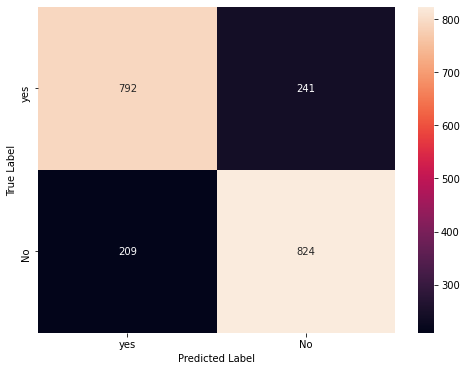

In [83]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_sm, annot=True, fmt='d')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks([0.5,1.5],labels=['yes', 'No'])
plt.yticks([0.5,1.5],labels=['yes', 'No'])
plt.show()

In [85]:
print(classification_report(y_test, ysm_pred_))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1033
           1       0.77      0.80      0.79      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



## precision, recall, f1-score have now increased and they are now around 80% for both the labels